# Data Driven Modeling
### (Theme of this semester: CODING AS LITERACY)
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


[Vahid Moosavi](https://vahidmoosavi.com/)
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# 14th Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;">04 April 2017</span>


# Introduction to Representation Learning 1

### To be discussed
* ** Signal Processing is a main part of Data Driven Modeling cases**
* **Harmonic Analysis, Fourier Series and Idealized Filters**
* **Fourier transfrom in 1D and 2D**
* **Introduction to Representation Learning**

In [7]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
# import pandas.io.data
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import sys
import sompylib.sompy as SOM# from pandas import Series, DataFrame

from ipywidgets import interact, HTML, FloatSlider

%matplotlib inline


# Signal Processing is a main part of Data Driven Modeling cases
* **Usually observations are homogeneous**
    * **Pixels of image**
    * **Sequence of values in sound signal or any other time series**
* ** Usually, we are looking for something on top of the observations**
    * **Message of the sentence** 
    * **A certain pattern in an image such as a face in the picture** 
* ** All the methods are developed in a way to capture "invariances" within categories of interest**
    * **translation invariance**
    * **rotation invariance**
    * **scale invariance** 
    * **Deformation**
* **Hierarchical Representation and Compositionality**
    * Text
    * Video
    * A Building
    * Cities

## An example of translation
### If we naively compare two signals elementwise we get nothing!

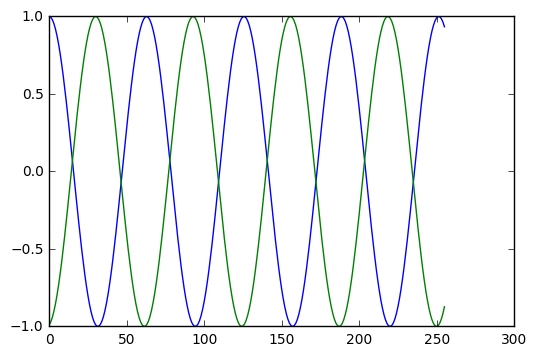

In [8]:
N = 256
t = np.arange(N)
fi = .1*t
r = 1
z = np.cos(.1*t)
z1 = np.cos(.1*(t-30))
# .0*np.random.rand(N)
plt.plot(z)
plt.plot(z1)

### Deformation/rotation, ...
![](Images/MNISTDeformed.png)


### Scale Invariance
![](Images/scaleinv_tree.png)



# Fourier Analysis is among the most fundamental methods in this field, developed in early 19th century

# Interplay between Time and Frequency domains!

### Essentially is says it is possible to represent any integrable function as a linear sum of sinosoidal functions with different frequencies

#### Much related with more general concepts such as Taylor Series: https://en.wikipedia.org/wiki/Taylor_series
<hr style="height:4px;border:none;color:stillblue;background-color:black;" />


# Fourier Series as Harmonic Analysis

### Examples of known functions
![an image](Images/fourier_decomp2.gif)
![an image](Images/fourier_decomp1.gif)


Source = https://gist.github.com/amroamroamro/617305c05001caffc8d0
<hr style="height:3px;border:none;color:stillblue;background-color:red;" />


# A more interactive version
https://bl.ocks.org/jinroh/7524988

<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

# Fourier Series as Basis Functions (Linear Algebraic View)

## The Fourier series is linear algebra in infinite dimensions, where vectors are functions
![](Images/Fourier1.png)

# The Coefficients need to be calculated 
![](Images/Fourier2.png)




<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

# More Data Driven Way
## In practice we don't know the functions in advance, but we have observed signals. 
## So mainly we use Fourier transform from time domain to frequency domain.



<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />
#  Discrete Fourier Transform (DFT) 
https://en.wikipedia.org/wiki/DFT_matrix

### An important concept
### Euler's formula
![](Images/euler_formula.svg)
It manages to encapsulate both cosine and sine function in a single complex exponentials.
https://en.wikipedia.org/wiki/Euler%27s_formula#Using_power_series

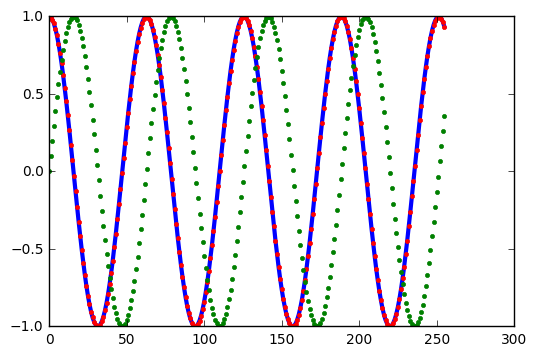

In [55]:
#Complex Exponentials
N = 256
t = np.arange(N)
fi = .1*t
r = 1
cos = np.cos(.1*t)
sin = np.sin(.1*t)
ex = cos + 1j*sin
plt.plot(cos,linewidth=3)
plt.plot(np.real(ex),'.r')
plt.plot(np.imag(ex),'.g')

# DFT
### We design a Matrix, W which has as many as possible waves and use them as filters

## $$X= Wx\ $$


----
![](Images/DFT_W.svg)
----
![](Images/DFT_omega.svg)
----
![](Images/euler_formula.svg)

In [95]:
#Base Filters 1D
def base_filter_1D(N):
    dd = -2*np.pi/N
    w = np.exp(dd*1j)
#     w = np.exp(-2*np.pi*1j/N)
    
    W = np.ones((N,N),dtype=complex)
    
    for i in range(N):
        for j in range(N):
            W[i,j] = np.power(w,i*j)

#     W = W/np.sqrt(N)
    return W


N = 4
W = base_filter_1D(N)
print np.around(W,decimals=3)

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.-1.j -1.-0.j -0.+1.j]
 [ 1.+0.j -1.-0.j  1.+0.j -1.-0.j]
 [ 1.+0.j -0.+1.j -1.-0.j  0.-1.j]]


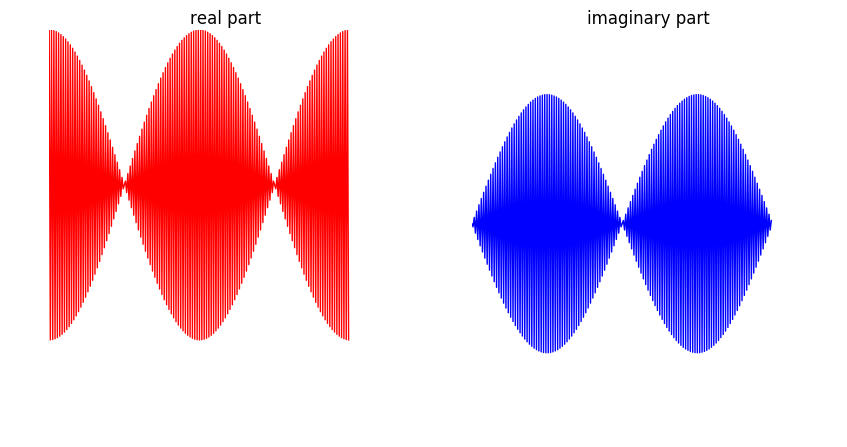

In [96]:
def DFT_1D_basis_vis(i):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    #Real Part of the vector
    plt.plot(np.real(W)[i],'r')
    #Imaginary Part of the vector
    plt.title('real part')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('imaginary part')
    plt.plot(np.imag(W)[i],'b')
    plt.axis('off')
N = 256
W = base_filter_1D(N)
interact(DFT_1D_basis_vis,i=(0,N-1,1));

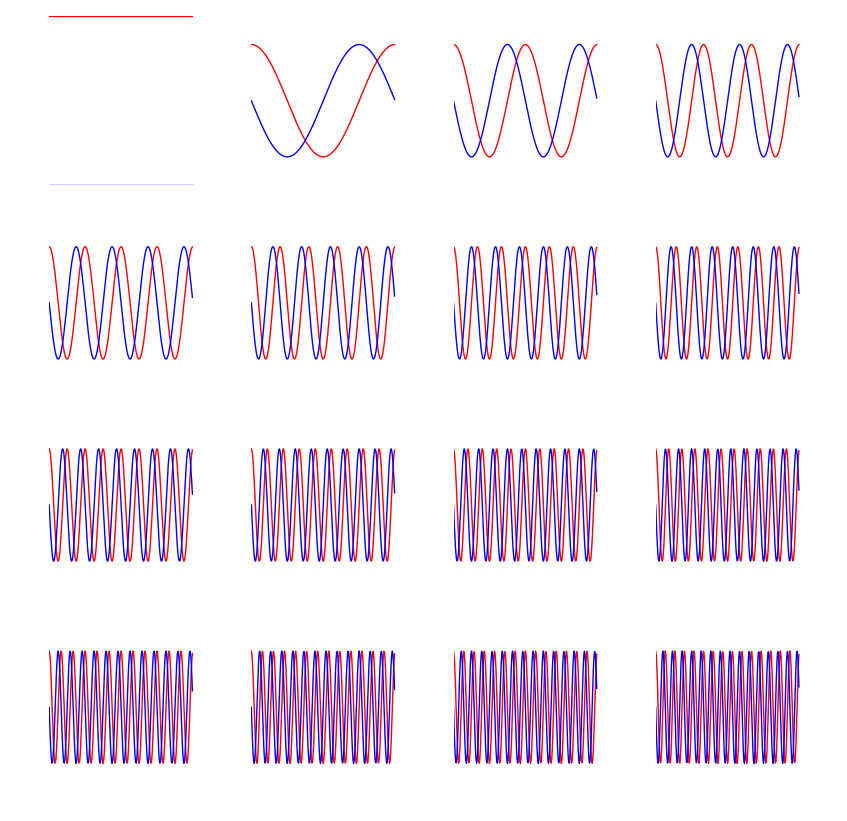

In [58]:
fig = plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.plot(np.real(W)[i],'r')
    plt.plot(np.imag(W)[i],'b')
    plt.axis('off')

In [18]:
# They are orthogonal basis
#Each row of W is a basis

#Orthogonal Basis
a = np.imag(W)[2].dot(np.imag(W)[1])
print np.around(a)


#Sin and Cos
a = np.real(W)[2].dot(np.imag(W)[1])
print np.around(a)

-0.0
-0.0


## Now from Time domain to Frequency domain

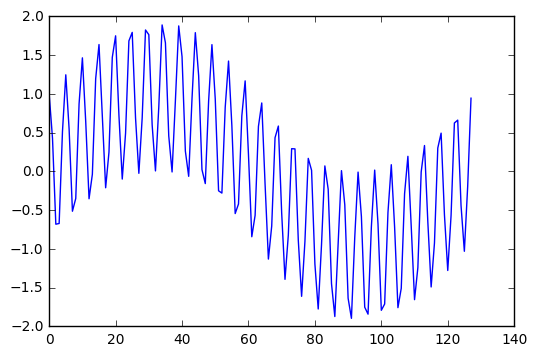

In [62]:
N = 128
t = np.arange(N)
x = 1*np.sin(.05*t) + 1*np.cos(5*t+.1)
plt.plot(x)

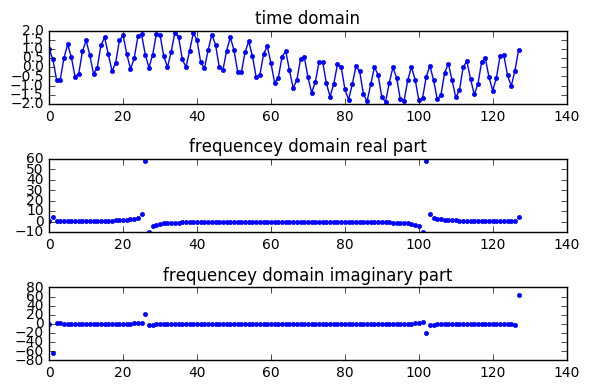

In [63]:
#DFT 1D
# Now we can transform this original signals to a new vector space based on fourier base patterns
# How to transform the original signal (DATA) to a new basis system 
W = base_filter_1D(N)
X1 = W.dot(x)
# plt.plot(X,'.r')
plt.subplot(3,1,1)
plt.plot(x,'.-');
plt.title('time domain');
plt.subplot(3,1,2)
plt.plot(np.real(X1),'.');
plt.title('frequencey domain real part')
plt.subplot(3,1,3)
plt.plot(np.imag(X1),'.');
plt.title('frequencey domain imaginary part')
plt.tight_layout()

## Fast Fourier Transform (FFT) in Numpy


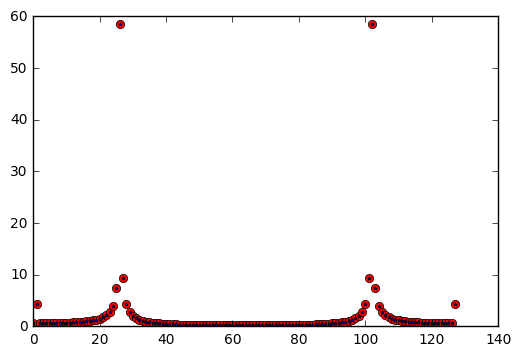

In [64]:

plt.plot(np.abs(np.real(X1)),'or');


X = np.fft.fft(x)
plt.plot(np.abs(np.real(X)),'*b',markersize=3);


## How does it deal with translation?
### we have two similar signals with a different in time

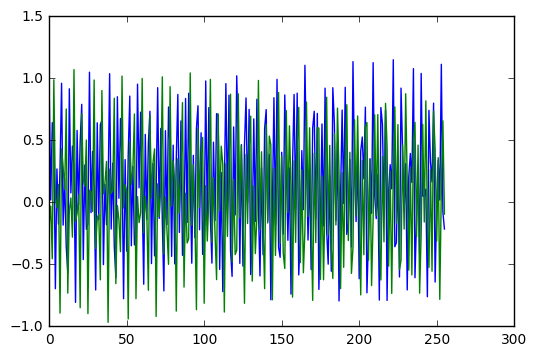

In [91]:
# Two signals have the same frequencies but with a shift in time
N = 256
t = np.arange(N)
x1 = .4*np.sin(1*t+.1) + .6*np.cos(-15*t+.1) + .3*np.random.rand(N)
x2 = .4*np.sin(1*(t-2)+.1) + .6*np.cos(-15*(t-16)+.1) + .1*np.random.rand(N)
plt.plot(x1)
plt.plot(x2)

In [92]:
W = base_filter_1D(N)
X1 = W.dot(x1)
X2 = W.dot(x2)

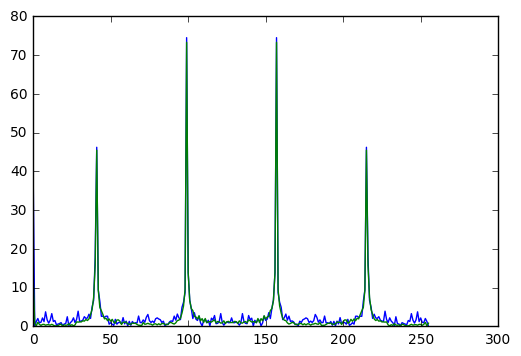

In [93]:
plt.plot(np.abs(np.absolute(X1)),'b');
plt.plot(np.abs(np.absolute(X2)),'g');

## Reconstruction 
### From freq to time

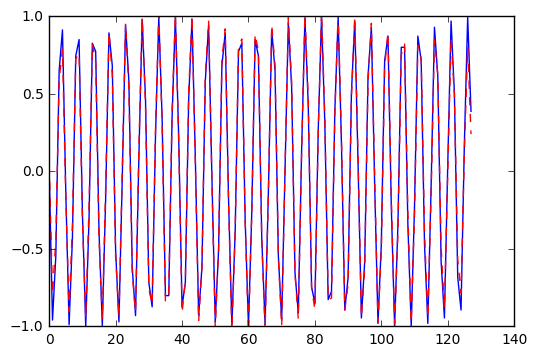

In [94]:
N = 128
t = np.arange(N)
x = 1*np.sin(5*t) 

W = base_filter_1D(N)
X = W.dot(x)
W_inv = np.linalg.inv(W)

def reconstruct_signal(howmanybasis=1):
    x_r = W_inv[:,:howmanybasis].dot(X[:howmanybasis])
    plt.plot(x[:],'b');
    plt.plot(x_r[:],'r--');
    plt.ylim(-1,1)
interact(reconstruct_signal,howmanybasis=(0,N-1,1));

## Denoising
### Note that there of course many other methods for signal smoothing and denoising 

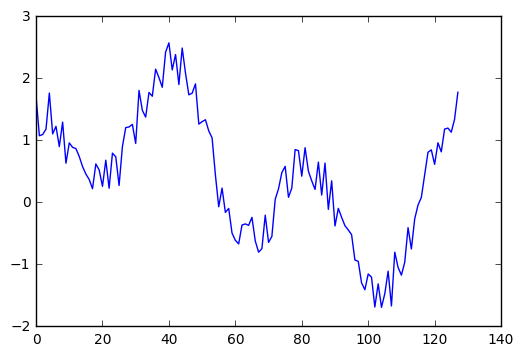

In [88]:
N = 128
t = np.arange(N)
x = 1*np.sin(.05*t) + 1*np.cos(.15*t+.1)  + .83*np.random.rand(N)

plt.plot(x[:],'b');


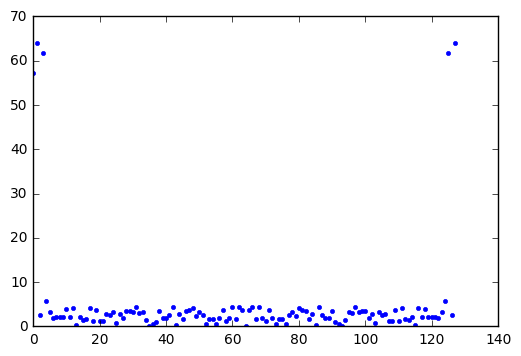

In [89]:
X  = np.fft.fft(x)
# plt.hist(X,bins=100);
plt.plot(np.absolute(X),'.');

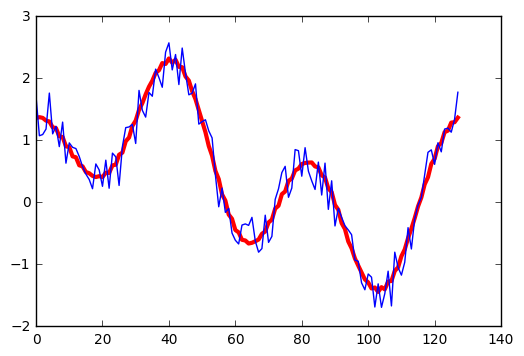

In [90]:
def denoise(howmany=1):
    X  = np.fft.fft(x)
    X[np.argsort(-1*np.absolute(X))[howmany:]]=0
    plt.plot(np.fft.ifft(X),'r',linewidth=3)
    plt.plot(x)
interact(denoise,howmany=(0,N,1));

# 2D Fourier Transform
http://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf


In [74]:
N = 16
W1D = base_filter_1D(N)
def base_filter2d_vis(u=1,v=1):
    
    r = W1D[u][np.newaxis,:].T
    c = W1D[v][np.newaxis,:]
    W2 = r.dot(c)
    fig = plt.figure(figsize=(15,7))
    plt.subplot(1,2,1)
    plt.title('Real Part(CoSine Wave)')
    plt.imshow(np.real(W2),cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('Imaginary Part (Sine Wave)')
    plt.axis('off')
    plt.imshow(np.imag(W2),cmap=plt.cm.gray)

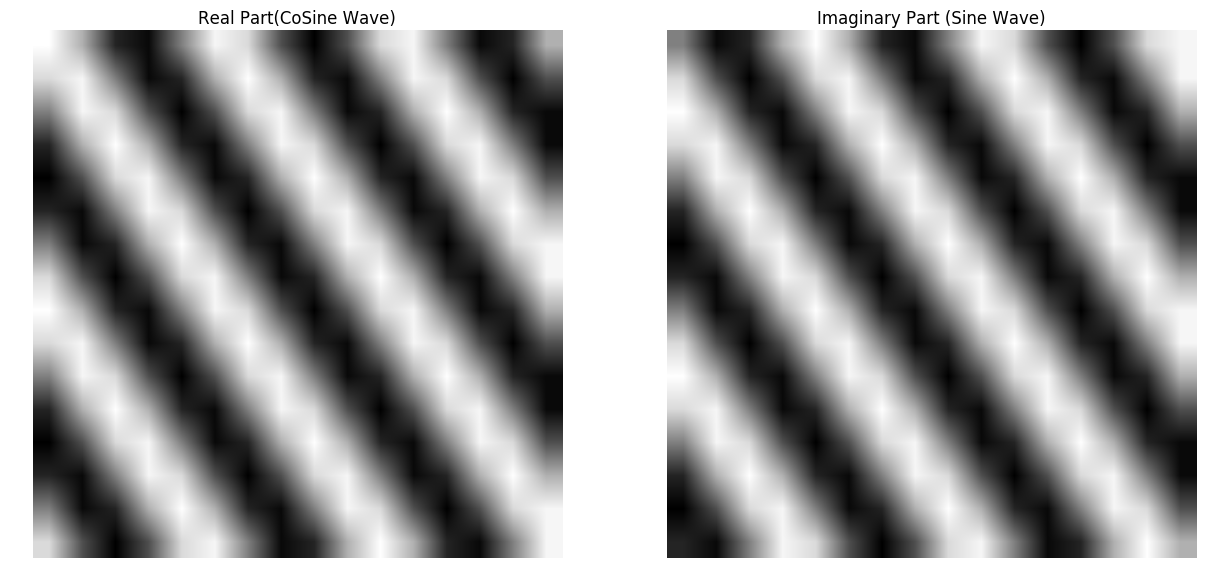

In [75]:
interact(base_filter2d_vis,u=(0,N-1,1),v=(0,N-1,1));

In [76]:
#Base Filters 2D
def base_filter_2D(N):
    W1D = base_filter_1D(N)*np.sqrt(N)
    W2D = np.ones((N,N,N,N),dtype=complex)
    
    for u in range(0,N):
        for v in range(0,N):
            r = W1D[u][np.newaxis,:].T
            c = W1D[v][np.newaxis,:]
            W2D[u,v,:,:] = r.dot(c)
    W2D = W2D/(np.sqrt(N*N))
    return W2D

## Base Filters Dictionary
* Note that these base filters are defined independent of the data!

(8, 8, 8, 8)


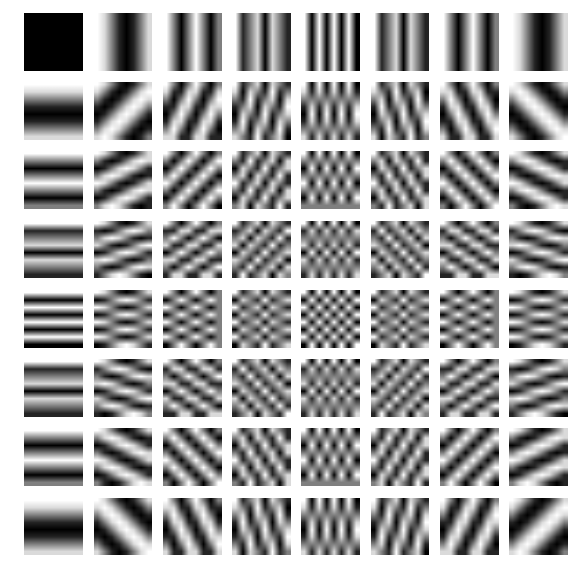

In [77]:
N = 8
W2D = base_filter_2D(N)
print W2D.shape
fig = plt.figure(figsize=(7,7))
k =1 
for u in range(0,N):
    for v in range(0,N):
        W2 = W2D[u,v,:,:]
        plt.subplot(N,N,k)
        plt.imshow(np.real(W2),cmap=plt.cm.gray)
#         plt.imshow(np.imag(W2),cmap=plt.cm.gray)
        k = k +1
        plt.axis('off')


In [34]:
#DFT  in 2D is much more time consuming.
# Each cell is calculate as the sum of the dot product of base filter corresponding of that cell and the whole image
## Very slow: Don't use it :)
def DFT2D(W2D,img):
    N = img.shape[0]
    M = img.shape[1]
    img_fr = np.ones((N,N),dtype=complex)
    for i in range(N):
        for j in range(M):
            img_fr[i,j]= W2D[i,j,:,:].dot(img).sum()
    return img_fr

def InverseDFT2D(howmanybasis=1):
    img_rec = img
    for u in range(howmanybasis):
        for v in range(howmanybasis):
            W = W2D[u,v,:]
            W_inv = np.linalg.inv(W)
            for i in range(N):
                for j in range(M):
                    img_rec[i,j]= W_inv.dot(IMG[:howmanybasis,:howmanybasis]).sum()

## Edge Detection
## Low Pass High Pass filters

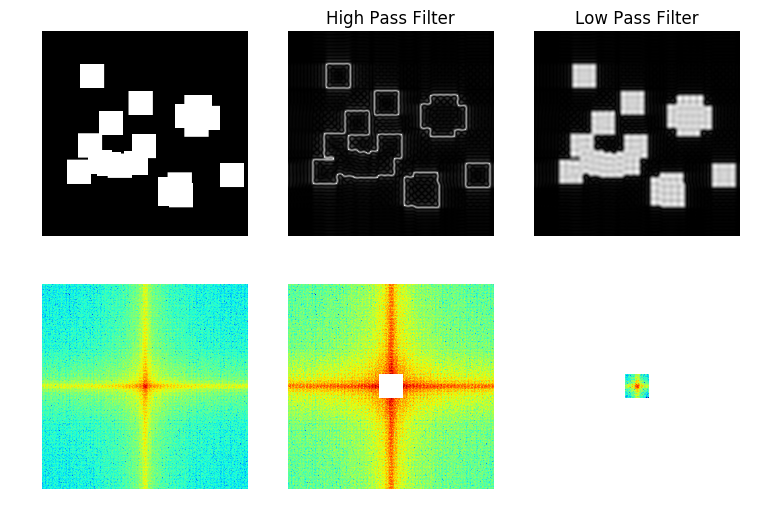

In [35]:
from skimage import data
from skimage.color import rgb2gray

fig = plt.figure(figsize=(9,6))

img = data.astronaut()
img = rgb2gray(img)
img = img 
# + np.random.rand(img.shape[0],img.shape[1])


N = img.shape[0]
img = np.zeros((N, N))

x = 60
y = 60


for i in range(20):
    indx = np.random.randint(x,N-x)
    indy = np.random.randint(y,N-y)
    img[indx:indx+x,indy:indy+y] = 1



plt.subplot(2,3,1)

plt.imshow(img,cmap=plt.cm.gray);
plt.axis('off')

F_img = np.fft.fft2(img)
F_img = np.fft.fftshift(F_img)
plt.subplot(2,3,4);
plt.imshow(np.log(np.absolute(F_img)));
plt.axis('off');

Nx = img.shape[0]
Ny = img.shape[1]

x  =30
y = 30
High_pass_freq =  F_img.copy()
High_pass_freq[Nx/2-x:Nx/2+x,Ny/2-y:Ny/2+y] = 0

High_pass_img = np.fft.ifft2(High_pass_freq)
plt.subplot(2,3,2);
plt.title('High Pass Filter');
plt.imshow(np.absolute(High_pass_img),cmap=plt.cm.gray);
plt.axis('off');


plt.subplot(2,3,5);
plt.imshow(np.log(np.absolute(High_pass_freq)));
plt.axis('off');



Low_pass_freq =  F_img.copy()
Low_pass_freq[Nx/2+x:,:] = 0
Low_pass_freq[:,:Ny/2-y] = 0
Low_pass_freq[:Nx/2-x,:] = 0
Low_pass_freq[:,Ny/2+y:] = 0

Low_pass_img = np.fft.ifft2(Low_pass_freq)
plt.subplot(2,3,3);
plt.title('Low Pass Filter');
plt.imshow(np.absolute(Low_pass_img),cmap=plt.cm.gray);
plt.axis('off');


plt.subplot(2,3,6);

plt.imshow(np.log(np.absolute(Low_pass_freq)));
plt.axis('off');

## Effect of Shift 

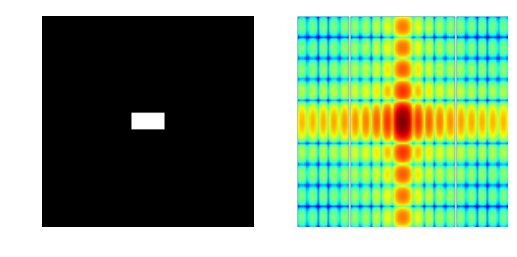

In [78]:
# Example 1
N = 128
x = 5
y = 10
img = np.zeros((128,128))
img[N/2-x:N/2+x,N/2-y:N/2+y] = 1
plt.subplot(1,2,1);
plt.imshow(img,cmap=plt.cm.gray);
plt.axis('off');


plt.subplot(1,2,2);
F_img = np.fft.fft2(img)
#To shift low pass (lower freq) to the center
F_img = np.fft.fftshift(F_img)
plt.imshow(np.log(np.absolute(F_img)));
plt.axis('off');


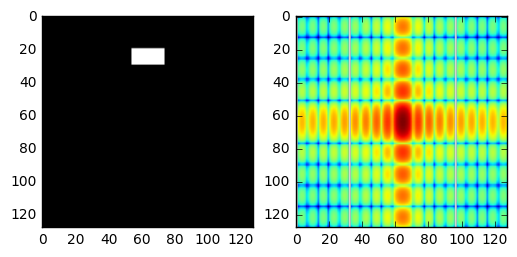

In [79]:
# Example 1
# With shift stil the patters are similar in freq domain
N = 128
x = 5
y = 10
img = np.zeros((128,128))
img[N/5-x:N/5+x,N/2-y:N/2+y] = 1
plt.subplot(1,2,1);
plt.imshow(img,cmap=plt.cm.gray);


plt.subplot(1,2,2);
F_img = np.fft.fft2(img)

#To shift low pass (lower freq) to the center
F_img = np.fft.fftshift(F_img);
plt.imshow(np.log(np.absolute(F_img)));

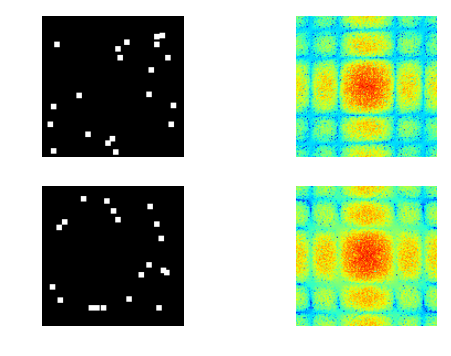

In [80]:
# Example 1
# With shift stil the patters are similar in freq domain
N = 128
x = 5
y = 5
img = np.zeros((128,128))

for i in range(20):
    indx = np.random.randint(x,N-x)
    indy = np.random.randint(y,N-y)
    img[indx:indx+x,indy:indy+y] = 1
plt.subplot(2,2,1);
plt.imshow(img,cmap=plt.cm.gray);
plt.axis('off');

plt.subplot(2,2,2);
F_img = np.fft.fft2(img)

#To shift low pass (lower freq) to the center
F_img = np.fft.fftshift(F_img)
plt.imshow(np.log(np.absolute(F_img)));
plt.axis('off');


img = np.zeros((128,128))

for i in range(20):
    indx = np.random.randint(x,N-x)
    indy = np.random.randint(y,N-y)
    img[indx:indx+x,indy:indy+y] = 1
plt.subplot(2,2,3);
plt.imshow(img,cmap=plt.cm.gray);
plt.axis('off');


plt.subplot(2,2,4);
F_img = np.fft.fft2(img)

#To shift low pass (lower freq) to the center
F_img = np.fft.fftshift(F_img)
plt.imshow(np.log(np.absolute(F_img)));
plt.axis('off');

## So in principle we can use the representations at the frequency domain as the variables for our other ML tasks such as classification.

## However, it doesn't work well for Scale variations

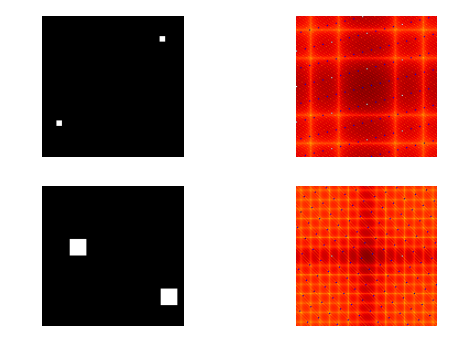

In [84]:
# Example 1
# With shift stil the patters are similar in freq domain
N = 128
x = 5
y = 5
img = np.zeros((128,128))

for i in range(2):
    indx = np.random.randint(x,N-x)
    indy = np.random.randint(y,N-y)
    img[indx:indx+x,indy:indy+y] = 1


# img = np.zeros((128,128))
# img[N/2-x:N/2+x,N/2-y:N/2+y] = 1

plt.subplot(2,2,1);
plt.imshow(img,cmap=plt.cm.gray);
plt.axis('off');

plt.subplot(2,2,2);
F_img = np.fft.fft2(img)

#To shift low pass (lower freq) to the center
F_img = np.fft.fftshift(F_img)
plt.imshow(np.log(np.absolute(F_img)));
plt.axis('off');


img = np.zeros((128,128))
x = 15
y = 15

# img = np.zeros((128,128))
# img[N/2-x:N/2+x,N/2-y:N/2+y] = 1

for i in range(2):
    indx = np.random.randint(x,N-x)
    indy = np.random.randint(y,N-y)
    img[indx:indx+x,indy:indy+y] = 1
plt.subplot(2,2,3);
plt.imshow(img,cmap=plt.cm.gray);
plt.axis('off');


plt.subplot(2,2,4);
F_img = np.fft.fft2(img)

#To shift low pass (lower freq) to the center
F_img = np.fft.fftshift(F_img)
plt.imshow(np.log(np.absolute(F_img)));
plt.axis('off');

# TO improve any of these exceptions there have been many different methods developed and this field sometimes is called "Feature Engineering"

# For Example 
* Wavelets
* Scattering Wavelets
* SIFT https://en.wikipedia.org/wiki/Scale-invariant_feature_transform
    * https://github.com/PyWavelets/pywt/tree/master/demo
    * https://media.readthedocs.org/pdf/pywavelets/latest/pywavelets.pdf
    * http://www.di.ens.fr/data/software/index.php#haarscat
    * http://www.di.ens.fr/data/software/scatnet/
* Many others

# But there is a conceptual limit in these approaches.
# As we can see filters in Fourier are just marginally effected by the data (via its dimension)
# Conceptually, Fouries Transform is at the same level as Polynomial regression, where there is a parametric structure imposed to data set. 


<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

# So a fundamental quesion has been always that wheter one can let the models learn the filters? 
## Until recently there were no alternative than desiging the filters, which means less capacity for the model
<hr style="height:3px;border:none;color:stillblue;background-color:red;" />

# PCA as a limited data driven feature learning doesn't work.

In [85]:
N = 30
x = 2
y = 2
nsq = 30
dim = N*N
image_shape = [N,N]
pattern_image = np.zeros((10000,dim))
for k in range(pattern_image.shape[0]):
    img = np.zeros((N,N))
    for i in range(20):
        indx = np.random.randint(x,N-x)
        indy = np.random.randint(y,N-y)
        img[indx:indx+x,indy:indy+y] = 1
    pattern_image[k,:]= img.flatten()


In [86]:
from sklearn.decomposition import PCA
X = pattern_image
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

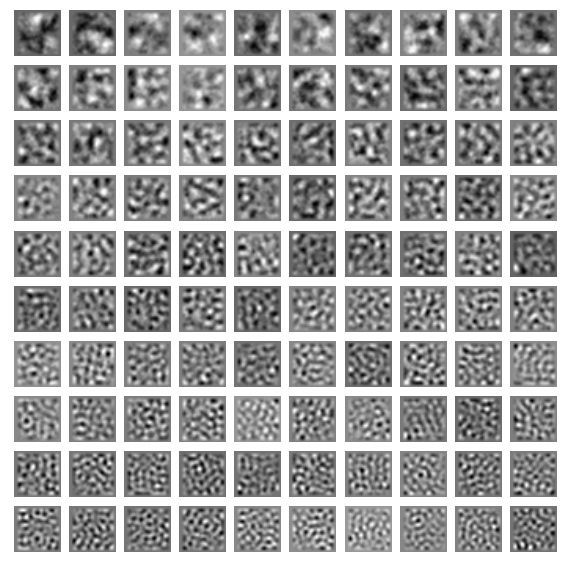

In [87]:
fig = plt.figure(figsize=(7,7))
W_pca = pca.components_
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow((W_pca[i]).reshape(image_shape),cmap=plt.cm.gray);
    plt.axis('off')
    plt.yticks([]);

# So finally what is Representation Learning? 

## Considering these factors?
* **translation invariance**
* **rotation invariance**
* **scale invariance** 
* **Deformation**

* **Compositionality and Hierarchical Representation**

(8, 8, 8, 8)


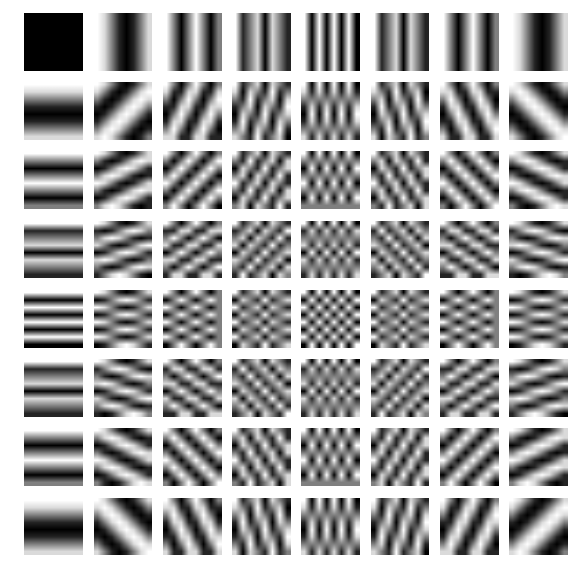

In [52]:
N = 8
W2D = base_filter_2D(N)
print W2D.shape
fig = plt.figure(figsize=(7,7))
k =1 
for u in range(0,N):
    for v in range(0,N):
        W2 = W2D[u,v,:,:]
        plt.subplot(N,N,k)
        plt.imshow(np.real(W2),cmap=plt.cm.gray)
#         plt.imshow(np.imag(W2),cmap=plt.cm.gray)
        k = k +1
        plt.axis('off')


## Convolutional Neural Networks (CNN) are seemingly a very good answer

![](Images/CNN_Face1.png)

## Next session we will dive into CNNs.